<h1><font color="#113D68" size=6>Actividad Semana 1</font></h1>
<h2><font color="#113D68" size=6>Análisis problema de clasificación con Deep Learning</font></h2>


<br><br>
<div style="text-align: right">
<font size=3>Daniel González</font><br>
<font size=3>Semana 1: Redes convolucionales y otros tipos de redes</font><br>
<font size=3>IEBS</font>
</div>

---


In [1]:
import tensorflow as tf
import numpy as np

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

En esta actividad vamos a seguir familiarizándonos con la herramienta *TensorFlow* pero esta vez para redes convolucionales, para ello seguiremos utilizando el dataset de imágenes a color visto en clase.

<a id="section2"></a>
# <font color="#004D7F" size=5>CIFAR10 dataset</font>

Este dataset es el que hemos visto en la clase anterior y con el que trabajaremos en el caso práctico. Para refresarlo, es un dataset que contiene imágenes en color de objetos que tenemos que clasificar.

El dataset de de imágenes CIFAR10 tiene las siguintes características:
- Imágenes de 10 tipos de objetos: aviones, automóbiles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones.
- Imágenes en color, es decir, cada pixel tiene 3 valores entre 0 y 255, esos valores corresponden a los valores de RGB (Red, Green, Blue).
- Imágenes de tamaño 32x32x3, 32x32 píxeles y 3 valores por pixel.
- 50.000 imágenes para el entrenamiento y 10.000 imágenes para el test.

<br><br>
<img src="https://drive.google.com/uc?id=1vVu275LEOyQCbw9x1f8ygfAhxS3PK_Zl" align="center" width="400">

## <font color="#004D7F" size=4>Ejercicio 1</font>
Para empezar debemos descargar los datos de las bases de datos de Tensorflow.

Carga los datos como hemos visto en clase:

In [2]:
# Completar
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Normaliza los datos:

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Familiarízate con el dataset accediendo a los elementos, viendo los tamaños, los valores, etc.

En las siguientes lineas se exploraran de manera muy general los datos que contienen las imagenes en cada test, mas que nada para verificar a simple ojo que los valores esten entre 0 y 1, es decir, normalizados

In [4]:
print("Los valores de una imagen del test con la que se trabajara en el test son:\n",x_test[0])


Los valores de una imagen del test con la que se trabajara en el test son:
 [[[0.61960784 0.43921569 0.19215686]
  [0.62352941 0.43529412 0.18431373]
  [0.64705882 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254902 0.14117647]
  [0.49411765 0.35686275 0.14117647]
  [0.45490196 0.33333333 0.12941176]]

 [[0.59607843 0.43921569 0.2       ]
  [0.59215686 0.43137255 0.15686275]
  [0.62352941 0.44705882 0.17647059]
  ...
  [0.53333333 0.37254902 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509804 0.13333333]]

 [[0.59215686 0.43137255 0.18431373]
  [0.59215686 0.42745098 0.12941176]
  [0.61960784 0.43529412 0.14117647]
  ...
  [0.54509804 0.38431373 0.13333333]
  [0.50980392 0.37254902 0.13333333]
  [0.47058824 0.34901961 0.12941176]]

 ...

 [[0.26666667 0.48627451 0.69411765]
  [0.16470588 0.39215686 0.58039216]
  [0.12156863 0.34509804 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254902]
  [0.05098039 0.25098039 0.42352941]
  [0.15686275 0.33333333 0.49803922]]

In [5]:
print("Los valores de una imagen del test con la que se trabajara en el tarining son:\n",x_train[0])

Los valores de una imagen del test con la que se trabajara en el tarining son:
 [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.078431

In [6]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [7]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


A continuacion se mostraran los detalles con los que se estaran trabajando, es decir, el numero de training,test y el tamaño de imagen que nos servira para poder ajustar correctamente los datos

In [8]:
print("Num training images: ", x_train.shape[0])
print("Num test images: ", x_test.shape[0])
print("Dimension input: ", x_train.shape)
print("Dimension output: ", y_train.shape)
print("Output example: ", y_train[0])

Num training images:  50000
Num test images:  10000
Dimension input:  (50000, 32, 32, 3)
Dimension output:  (50000, 1)
Output example:  [6]


In [9]:
print(f"El tamaño de una imagen es:{x_train[0].shape}")

El tamaño de una imagen es:(32, 32, 3)


Para poder observar y famirializarnos con las imagenes usaremos el siguiente codigo donde lo mas importante es poner en reshape los parametros correctos, para ello debemos de verificar que coincidan con Dimension input o bien con x_train.shape

In [10]:
def show_images(images, gray=True):
    fig=plt.figure(figsize=(10, 10))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images[index[i]].reshape([32, 32,3]), cmap=color)
    plt.show()

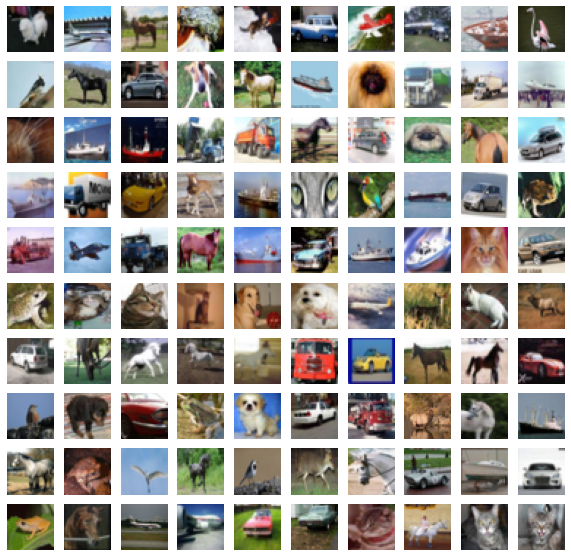

In [11]:
show_images(x_train)

<a id="section4"></a>
# <font color="#004D7F" size=5>Experimentos con CNNs</font>
A continuación, realiza 2 experimentos usando redes convolucionales con las redes que se te indican en cada sección.

<a id="section4.1"></a>
# <font color="#004D7F" size=4>Ejercicio 2</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 16 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.0001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 10

### Creacion de modelo
Se crea el modelo con referencia a las especificaciones anteriores,es decir con el numero de capas que se especifican segun la arquitectura

#### Arquitectura de red


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### Configuracion de entrenamineto

In [13]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                        

### Entrenamiento de red

In [14]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7962 - accuracy: 0.3637 - val_loss: 1.5569 - val_accuracy: 0.4484
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4987 - accuracy: 0.4729 - val_loss: 1.4449 - val_accuracy: 0.4884
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4033 - accuracy: 0.5063 - val_loss: 1.3855 - val_accuracy: 0.5121
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3416 - accuracy: 0.5294 - val_loss: 1.3206 - val_accuracy: 0.5367
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2917 - accuracy: 0.5477 - val_loss: 1.2930 - val_accuracy: 0.5398
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2545 - accuracy: 0.5616 - val_loss: 1.2852 - val_accuracy: 0.5403
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2197 - accuracy: 0.5726 - val_loss: 1.2437 - val_accuracy:

### Evaluar modelo
Se evalua el error

Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

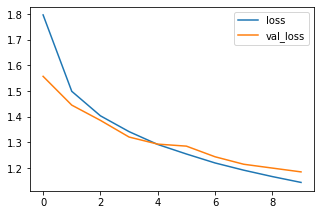

In [15]:
fig=plt.figure(figsize=(60, 40))
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

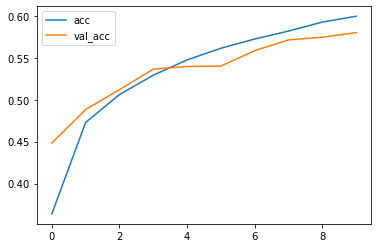

In [16]:
fig.add_subplot(10, 10, 1)
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

### Comprobacion
Se comprueba la precision o exactitud del modelo al poder categorizar la imagen, esto con el fin de tener algo mas grafico antes de sacar conclusiones, pues bien, si con los numeros ya es suficiente, compruebaprobar la exactitud no esta de mas 

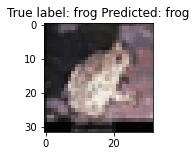

In [17]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i][0]], labels[prediction]));

In [18]:
# Completar

Escribe un pequeño texto sacando conclusiones de los resultado obtenidos:

Al observar el entrenamiento de res el error y la precision disminuyen y aumentan respectivamente de manera muy optima, pasando la precision el 50%, lo cual nos indica que el modelo es "optimo", al compribar las graficas y tener conjunto de validacion por debajo del trian con poca diferencia nos dice que el modleo funciona adecuadamente

<a id="section4.2"></a>
# <font color="#004D7F" size=4>Ejercicio 3</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 32 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels de tamaño `(3,3)`, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels de tamaño `(3,3)`, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 20

### Creacion de modelo
Se crea el modelo con referencia a las especificaciones anteriores,es decir con el numero de capas que se especifican segun la arquitectura

#### Arquitectura de red

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### Configuracion de entrenamineto

In [20]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)        

### Entrenamiento de red

In [21]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4533 - accuracy: 0.4740 - val_loss: 1.1303 - val_accuracy: 0.5990
Epoch 2/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0335 - accuracy: 0.6366 - val_loss: 0.9555 - val_accuracy: 0.6662
Epoch 3/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8783 - accuracy: 0.6925 - val_loss: 0.8777 - val_accuracy: 0.6979
Epoch 4/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7761 - accuracy: 0.7294 - val_loss: 0.8403 - val_accuracy: 0.7140
Epoch 5/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7054 - accuracy: 0.7553 - val_loss: 0.8066 - val_accuracy: 0.7273
Epoch 6/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6435 - accuracy: 0.7763 - val_loss: 0.8168 - val_accuracy: 0.7252
Epoch 7/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5937 - accuracy: 0.7938 - val_loss: 0.8941 -

### Evaluar modelo
Se evalua el error

Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

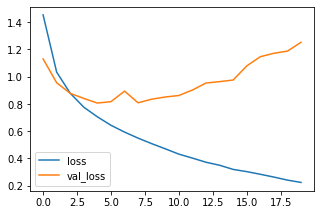

In [22]:
fig=plt.figure(figsize=(60, 40))
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

Se evalua la precision

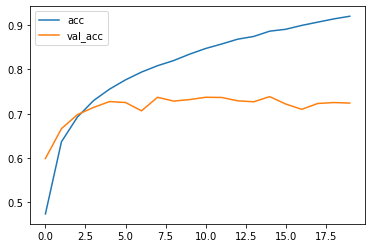

In [23]:
fig.add_subplot(10, 10, 1)
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

### Comprobacion
Se comprueba la precision o exactitud del modelo al poder categorizar la imagen, esto con el fin de tener algo mas grafico antes de sacar conclusiones, pues bien, si con los numeros ya es suficiente, compruebaprobar la exactitud no esta de mas.

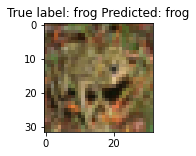

In [38]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i][0]], labels[prediction]));

Escribe un pequeño texto sacando conclusiones de los resultado obtenidos:

Al examinar los epochs tan solo la validacion en el primero es muy cercano al 50% y al final pasa poo arriba del 90% y el error disminuye abruptamente casi un punto, por lo cual, es un modelo muy efieciente no solo por estar por encima del 59% si no porque tanto el error como la validacion son optimos y las graficas respaldan esto.

Los datos de validacion se estancan por lo cual podria haber sobre ajuste.

# <font color="#004D7F" size=3>Ejercicio 4</font>
Una vez realizado todos los experimentos anteriores, ¿qué modelo elegirías para desplegar en producción? ¿Por qué? 

Explica en breves palabras qué modelo eligirías para desplegar en producción y porqué. Compara cada experimento y extráe tus propias conclusiones.

Al observas ambos modelos con sus respectivas configuraciones y entrenaminetos el uso de mas filtros hace que tenga mas presision asi como aumnetar las capas, de un accuracy de 57 se pasa a 91 y val accuracy o con los datos que no ha visto pasa de 55 a 72, es notoria la mejora gracias al numero de filtros y capas.
El primero modelo repreenta ciertas singularidades en la grafica con esos picos que suben y bajana a comparacion del modelo dos con ligeras singularidades.

IMportante, el sobre entrenamiento podria afectar mucho al accuracy , pues de los 10 epochs sube muy poco, si se soluciona esto se tendra mejores resultados